In [1]:
import cvxopt as cvx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.spatial.distance as dt

data_set = np.genfromtxt("hw06_images.csv", delimiter = ",")
labels = np.genfromtxt("hw06_labels.csv", delimiter = ",")

In [2]:
X_train = data_set[:1000]
y_train = labels[:1000]

In [3]:
X_test = data_set[1000:]
y_test = labels[1000:]

In [4]:
# define Gaussian kernel function
def gaussian_kernel(X1, X2, s):
    D = dt.cdist(X1, X2)
    K = np.exp(-D**2 / (2 * s**2))
    return(K)

In [5]:
N_train = len(y_train)
D_train = X_train.shape[1]

In [6]:
y1 = np.array([1 if i == 1 else -1 for i in y_train]).astype(float)
y2 = np.array([1 if i == 2 else -1 for i in y_train]).astype(float)
y3 = np.array([1 if i == 3 else -1 for i in y_train]).astype(float)
y4 = np.array([1 if i == 4 else -1 for i in y_train]).astype(float)
y5 = np.array([1 if i == 5 else -1 for i in y_train]).astype(float)

In [7]:
def getSVM(y_train, s = 10, C = 10):
    # calculate Gaussian kernel
    K_train = gaussian_kernel(X_train, X_train, s)
    yyK = np.matmul(y_train[:,None], y_train[None,:]) * K_train

    # set learning parameters

    epsilon = 1e-3

    P = cvx.matrix(yyK)
    q = cvx.matrix(-np.ones((N_train, 1)))
    G = cvx.matrix(np.vstack((-np.eye(N_train), np.eye(N_train))))
    h = cvx.matrix(np.vstack((np.zeros((N_train, 1)), C * np.ones((N_train, 1)))))
    A = cvx.matrix(1.0 * y_train[None,:])
    b = cvx.matrix(0.0)

    # use cvxopt library to solve QP problems
    result = cvx.solvers.qp(P, q, G, h, A, b)
    alpha = np.reshape(result["x"], N_train)
    alpha[alpha < C * epsilon] = 0
    alpha[alpha > C * (1 - epsilon)] = C

    # find bias parameter
    support_indices, = np.where(alpha != 0)
    active_indices, = np.where(np.logical_and(alpha != 0, alpha < C))
    w0 = np.mean(y_train[active_indices] * (1 - np.matmul(yyK[np.ix_(active_indices, support_indices)], alpha[support_indices])))
    print(C)
    return alpha, w0, K_train

In [8]:
'''# calculate predictions on training samples
f_predicted = np.matmul(K_train, y_train[:,None] * alpha[:,None]) + w0

# calculate confusion matrix
y_predicted = 2 * (f_predicted > 0.0) - 1
confusion_matrix = pd.crosstab(np.reshape(y_predicted, N_train), y_train, rownames = ['y_predicted'], colnames = ['y_train'])
print(confusion_matrix)'''

"# calculate predictions on training samples\nf_predicted = np.matmul(K_train, y_train[:,None] * alpha[:,None]) + w0\n\n# calculate confusion matrix\ny_predicted = 2 * (f_predicted > 0.0) - 1\nconfusion_matrix = pd.crosstab(np.reshape(y_predicted, N_train), y_train, rownames = ['y_predicted'], colnames = ['y_train'])\nprint(confusion_matrix)"

In [9]:
a1, w01, ktrain1 = getSVM(y1)

     pcost       dcost       gap    pres   dres
 0:  2.9600e+01 -4.2260e+04  8e+04  4e-01  4e-14
 1:  1.2992e+01 -7.4611e+03  8e+03  2e-02  3e-14
 2: -6.2643e+02 -2.9089e+03  2e+03  4e-03  3e-14
 3: -8.9105e+02 -1.7204e+03  8e+02  1e-03  3e-14
 4: -1.0255e+03 -1.3482e+03  3e+02  2e-04  4e-14
 5: -1.0893e+03 -1.1778e+03  9e+01  2e-05  4e-14
 6: -1.1096e+03 -1.1353e+03  3e+01  3e-07  4e-14
 7: -1.1169e+03 -1.1209e+03  4e+00  2e-14  4e-14
 8: -1.1184e+03 -1.1185e+03  1e-01  3e-14  4e-14
 9: -1.1185e+03 -1.1185e+03  4e-03  8e-14  4e-14
10: -1.1185e+03 -1.1185e+03  7e-05  7e-14  4e-14
Optimal solution found.
10


In [10]:
a2, w02, ktrain2 = getSVM(y2)

     pcost       dcost       gap    pres   dres
 0:  1.9161e+02 -4.0951e+04  8e+04  4e-01  3e-14
 1:  1.7375e+02 -7.6611e+03  9e+03  2e-02  2e-14
 2: -4.0615e+02 -2.9616e+03  3e+03  6e-03  2e-14
 3: -6.2557e+02 -1.7531e+03  1e+03  2e-03  2e-14
 4: -7.5417e+02 -1.1618e+03  4e+02  4e-04  3e-14
 5: -8.2696e+02 -9.7495e+02  1e+02  7e-14  3e-14
 6: -8.5262e+02 -8.9665e+02  4e+01  3e-14  3e-14
 7: -8.6181e+02 -8.7420e+02  1e+01  3e-14  3e-14
 8: -8.6497e+02 -8.6821e+02  3e+00  1e-14  3e-14
 9: -8.6600e+02 -8.6646e+02  5e-01  8e-15  3e-14
10: -8.6615e+02 -8.6622e+02  7e-02  3e-14  3e-14
11: -8.6618e+02 -8.6618e+02  9e-04  2e-15  3e-14
12: -8.6618e+02 -8.6618e+02  1e-05  5e-14  3e-14
Optimal solution found.
10


In [11]:
a3, w03, ktrain3 = getSVM(y3)

     pcost       dcost       gap    pres   dres
 0:  1.1844e+02 -5.1297e+04  1e+05  5e-01  3e-14
 1:  4.2823e+02 -1.0079e+04  1e+04  2e-02  2e-14
 2: -4.3384e+02 -3.3474e+03  3e+03  3e-03  2e-14
 3: -7.4758e+02 -1.9976e+03  1e+03  9e-04  2e-14
 4: -8.9381e+02 -1.4365e+03  5e+02  3e-04  2e-14
 5: -9.8213e+02 -1.1677e+03  2e+02  5e-05  2e-14
 6: -1.0174e+03 -1.0749e+03  6e+01  1e-05  2e-14
 7: -1.0296e+03 -1.0480e+03  2e+01  4e-14  3e-14
 8: -1.0350e+03 -1.0380e+03  3e+00  4e-14  3e-14
 9: -1.0360e+03 -1.0362e+03  2e-01  3e-14  3e-14
10: -1.0361e+03 -1.0361e+03  4e-03  3e-14  3e-14
11: -1.0361e+03 -1.0361e+03  7e-05  4e-14  3e-14
Optimal solution found.
10


In [12]:
a4, w04, ktrain4 = getSVM(y4)

     pcost       dcost       gap    pres   dres
 0: -5.0057e+02 -5.0242e+04  8e+04  3e-01  4e-14
 1: -5.5603e+02 -8.9813e+03  9e+03  1e-02  4e-14
 2: -1.3487e+03 -3.4368e+03  2e+03  2e-03  4e-14
 3: -1.6731e+03 -2.5433e+03  9e+02  3e-04  4e-14
 4: -1.8026e+03 -2.1922e+03  4e+02  6e-05  5e-14
 5: -1.8680e+03 -1.9850e+03  1e+02  8e-06  5e-14
 6: -1.8927e+03 -1.9224e+03  3e+01  7e-07  5e-14
 7: -1.9008e+03 -1.9050e+03  4e+00  5e-14  6e-14
 8: -1.9023e+03 -1.9024e+03  1e-01  6e-14  6e-14
 9: -1.9023e+03 -1.9023e+03  2e-03  5e-14  5e-14
10: -1.9023e+03 -1.9023e+03  5e-05  6e-14  5e-14
Optimal solution found.
10


In [13]:
a5, w05, ktrain5 = getSVM(y5)

     pcost       dcost       gap    pres   dres
 0:  7.0372e+02 -3.9006e+04  9e+04  4e-01  2e-14
 1:  8.8098e+02 -6.5835e+03  1e+04  3e-02  1e-14
 2:  1.8077e+02 -1.2718e+03  2e+03  3e-03  1e-14
 3: -4.2561e+01 -4.8795e+02  5e+02  6e-04  8e-15
 4: -1.0334e+02 -2.6112e+02  2e+02  1e-04  7e-15
 5: -1.2629e+02 -1.9573e+02  7e+01  4e-05  7e-15
 6: -1.3971e+02 -1.6794e+02  3e+01  6e-06  8e-15
 7: -1.4558e+02 -1.5551e+02  1e+01  1e-14  9e-15
 8: -1.4845e+02 -1.5012e+02  2e+00  9e-15  9e-15
 9: -1.4906e+02 -1.4917e+02  1e-01  2e-15  9e-15
10: -1.4910e+02 -1.4911e+02  1e-03  7e-15  9e-15
11: -1.4911e+02 -1.4911e+02  1e-05  9e-15  9e-15
Optimal solution found.
10


In [14]:
# calculate predictions on training samples
f_predicted1 = np.matmul(ktrain1, y1[:,None] * a1[:,None]) + w01

# calculate confusion matrix
y_predicted1 = 2 * (f_predicted1 > 0.0) - 1
confusion_matrix = pd.crosstab(np.reshape(y_predicted1, N_train), y1, rownames = ['y_predicted'], colnames = ['y_train'])
print(confusion_matrix)

y_train      -1.0   1.0
y_predicted            
-1            784    11
 1              7   198


In [15]:
# calculate predictions on training samples
f_predicted2 = np.matmul(ktrain2, y2[:,None] * a2[:,None]) + w02

# calculate confusion matrix
y_predicted2 = 2 * (f_predicted2 > 0.0) - 1
confusion_matrix = pd.crosstab(np.reshape(y_predicted2, N_train), y2, rownames = ['y_predicted'], colnames = ['y_train'])
print(confusion_matrix)

y_train      -1.0   1.0
y_predicted            
-1            794    10
 1              4   192


In [16]:
# calculate predictions on training samples
f_predicted3 = np.matmul(ktrain3, y3[:,None] * a3[:,None]) + w03

# calculate confusion matrix
y_predicted3 = 2 * (f_predicted3 > 0.0) - 1
confusion_matrix = pd.crosstab(np.reshape(y_predicted3, N_train), y3, rownames = ['y_predicted'], colnames = ['y_train'])
print(confusion_matrix)

y_train      -1.0   1.0
y_predicted            
-1            786     9
 1              5   200


In [17]:
# calculate predictions on training samples
f_predicted4 = np.matmul(ktrain4, y4[:,None] * a4[:,None]) + w04

# calculate confusion matrix
y_predicted4 = 2 * (f_predicted4 > 0.0) - 1
confusion_matrix = pd.crosstab(np.reshape(y_predicted4, N_train), y4, rownames = ['y_predicted'], colnames = ['y_train'])
print(confusion_matrix)

y_train      -1.0   1.0
y_predicted            
-1            791    27
 1              8   174


In [18]:
# calculate predictions on training samples
f_predicted5 = np.matmul(ktrain5, y5[:,None] * a5[:,None]) + w05

# calculate confusion matrix
y_predicted5 = 2 * (f_predicted5 > 0.0) - 1
confusion_matrix = pd.crosstab(np.reshape(y_predicted5, N_train), y5, rownames = ['y_predicted'], colnames = ['y_train'])
print(confusion_matrix)

y_train      -1.0   1.0
y_predicted            
-1            821     1
 1              0   178


In [19]:
preds = np.argmax([f_predicted1,f_predicted2,f_predicted3,f_predicted4,f_predicted5], axis=0)
preds = preds + 1

In [20]:
confusion_matrix = pd.crosstab(np.reshape(preds, N_train), y_train, rownames = ['y_predicted'], colnames = ['y_train'])
print(confusion_matrix)

y_train      1.0  2.0  3.0  4.0  5.0
y_predicted                         
1            207    1    0    9    0
2              2  199    1    1    0
3              0    1  204    6    0
4              0    1    4  185    1
5              0    0    0    0  178


In [21]:
s = 10
K_test = gaussian_kernel(X_test, X_train, s)
#np.matmul(ktrain4, y4[:,None] * a4[:,None])
f_predicted1 = np.matmul(K_test, y1[:,None] * a1[:,None]) + w01

In [22]:
f_predicted2 = np.matmul(K_test, y2[:,None] * a2[:,None]) + w02

In [23]:
f_predicted3 = np.matmul(K_test, y3[:,None] * a3[:,None]) + w03

In [24]:
f_predicted4 = np.matmul(K_test, y4[:,None] * a4[:,None]) + w04

In [25]:
f_predicted5 = np.matmul(K_test, y5[:,None] * a5[:,None]) + w05

In [26]:
preds = np.argmax([f_predicted1,f_predicted2,f_predicted3,f_predicted4,f_predicted5], axis=0)
preds = preds + 1

In [27]:
confusion_matrix = pd.crosstab(np.reshape(preds, 4000), y_test, rownames = ['y_predicted'], colnames = ['y_train'])
print(confusion_matrix)

y_train      1.0  2.0  3.0  4.0  5.0
y_predicted                         
1            641   23    3  137    9
2             43  714   27   40    4
3              4   39  666   90   10
4            100   32   69  541   16
5             12    2    6   15  757


In [28]:
trainAcc = list()
testAcc = list()
acc = 0
cList = [0.1, 1, 10, 100, 1000]
for c in cList:
    print(c)
    a1, w01, ktrain1 = getSVM(y1, C = c)
    a2, w02, ktrain2 = getSVM(y2, C = c)
    a3, w03, ktrain3 = getSVM(y3, C = c)
    a4, w04, ktrain4 = getSVM(y4, C = c)
    a5, w05, ktrain5 = getSVM(y5, C = c)
    
    f_predicted1 = np.matmul(ktrain1, y1[:,None] * a1[:,None]) + w01
    f_predicted2 = np.matmul(ktrain2, y2[:,None] * a2[:,None]) + w02
    f_predicted3 = np.matmul(ktrain3, y3[:,None] * a3[:,None]) + w03
    f_predicted4 = np.matmul(ktrain4, y4[:,None] * a4[:,None]) + w04
    f_predicted5 = np.matmul(ktrain5, y5[:,None] * a5[:,None]) + w05
    preds = np.argmax([f_predicted1,f_predicted2,f_predicted3,f_predicted4,f_predicted5], axis=0)
    preds = preds + 1
    
    confusion_matrix = pd.crosstab(np.reshape(preds, N_train), y_train, rownames = ['y_predicted'], colnames = ['y_train'])
    
    acc = np.sum(np.diag(np.array(confusion_matrix))) / np.sum(np.array(confusion_matrix))
    trainAcc.append(acc)
    
    s = 10
    K_test = gaussian_kernel(X_test, X_train, s)
    #np.matmul(ktrain4, y4[:,None] * a4[:,None])
    f_predicted1 = np.matmul(K_test, y1[:,None] * a1[:,None]) + w01
    f_predicted2 = np.matmul(K_test, y2[:,None] * a2[:,None]) + w02
    f_predicted3 = np.matmul(K_test, y3[:,None] * a3[:,None]) + w03
    f_predicted4 = np.matmul(K_test, y4[:,None] * a4[:,None]) + w04
    f_predicted5 = np.matmul(K_test, y5[:,None] * a5[:,None]) + w05
    
    preds = np.argmax([f_predicted1,f_predicted2,f_predicted3,f_predicted4,f_predicted5], axis=0)
    preds = preds + 1
    
    confusion_matrix = pd.crosstab(np.reshape(preds, 4000), y_test, rownames = ['y_predicted'], colnames = ['y_train'])
    acc = np.sum(np.diag(np.array(confusion_matrix))) / np.sum(np.array(confusion_matrix))
    
    testAcc.append(acc)

0.1
     pcost       dcost       gap    pres   dres
 0: -1.3936e+02 -2.2047e+02  7e+03  3e+01  4e-15
 1: -3.4801e+01 -2.0264e+02  4e+02  9e-01  3e-15
 2: -2.8151e+01 -7.9601e+01  5e+01  1e-15  1e-15
 3: -3.1266e+01 -4.3423e+01  1e+01  1e-15  8e-16
 4: -3.2572e+01 -3.9120e+01  7e+00  3e-16  6e-16
 5: -3.3423e+01 -3.6637e+01  3e+00  3e-16  7e-16
 6: -3.3666e+01 -3.6029e+01  2e+00  1e-15  7e-16
 7: -3.4121e+01 -3.4971e+01  9e-01  4e-16  7e-16
 8: -3.4319e+01 -3.4585e+01  3e-01  2e-16  8e-16
 9: -3.4415e+01 -3.4445e+01  3e-02  1e-15  8e-16
10: -3.4429e+01 -3.4430e+01  1e-03  8e-16  8e-16
11: -3.4429e+01 -3.4429e+01  5e-05  2e-16  8e-16
12: -3.4429e+01 -3.4429e+01  1e-06  2e-16  8e-16
Optimal solution found.
0.1
     pcost       dcost       gap    pres   dres
 0: -1.1812e+02 -2.1835e+02  7e+03  3e+01  3e-15
 1: -3.1287e+01 -2.0015e+02  5e+02  1e+00  3e-15
 2: -2.4529e+01 -8.1514e+01  6e+01  2e-16  9e-16
 3: -2.7550e+01 -4.0807e+01  1e+01  2e-16  8e-16
 4: -2.8779e+01 -3.6453e+01  8e+00  2e-

In [29]:
trainAcc

[0.729, 0.85, 0.973, 1.0, 0.994]

In [30]:
testAcc

[0.7265, 0.81075, 0.82975, 0.8075, 0.7765]

In [31]:
(10**np.log10(cList))

array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

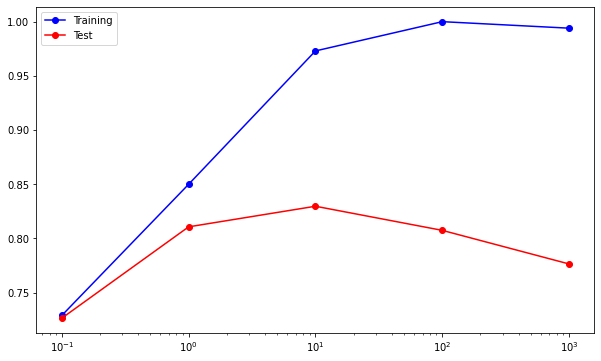

<Figure size 720x432 with 0 Axes>

In [32]:
import matplotlib
fig1, ax1 = plt.subplots(figsize=(10, 6))
plt.figure(figsize = (10, 6))
ax1.plot(cList, trainAcc,"bo-", label = 'Training')
ax1.plot(cList, testAcc,"ro-", label = 'Test')
ax1.legend(loc='upper left')
ax1.set_xscale('log')
#ax1.set_xticks(cList)
ax1.set_xticks(ticks = cList)
#ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())